In [3]:
import importlib
import os
import json
import shutil
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from ray import tune
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.integration.keras import TuneReportCallback
from ray.air import session
import tensorflow as tf
import yaml
import logomaker
import tfomics
from tfomics import impress, explain, moana

from hominid_pipeline import utils, model_zoo, hominid

2023-06-09 10:04:05.587461: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-09 10:04:06.517204: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-09 10:04:06.517282: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-09 10:04:06.517289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [5]:
importlib.reload(hominid)

<module 'hominid_pipeline.hominid' from '/home/chandana/projects/hominid_pipeline/hominid_pipeline/hominid.py'>

In [4]:
working_dir = "/home/chandana/projects/hominid_pipeline/results"
hits = [
    "experiments/sweeps/tune_hominid_8f34a_00085_85_conv1_activation=exponential,conv1_attention_pool_size=23,conv1_batchnorm=True,conv1_channel_weight=se_2023-05-18_00-04-12",
    "experiments/sweeps/tune_hominid_8f34a_00185_185_conv1_activation=relu,conv1_attention_pool_size=23,conv1_batchnorm=True,conv1_channel_weight=softconv_2023-05-18_06-11-38",
    "experiments/model_variations/tune_hominid_8f34a_00058_58_conv1_activation=relu,conv1_attention_pool_size=30,conv1_batchnorm=False,conv1_channel_weight=softconv_2023-05-17_22-09-59/exponential", # this one!
    "experiments/model_variations/tune_hominid_8f34a_00056_56_conv1_activation=relu,conv1_attention_pool_size=5,conv1_batchnorm=False,conv1_channel_weight=se,conv1__2023-05-17_22-05-53/exponential",
    "experiments/model_variations/tune_hominid_8f34a_00058_58_conv1_activation=relu,conv1_attention_pool_size=30,conv1_batchnorm=False,conv1_channel_weight=softconv_2023-05-17_22-09-59/exponential/variations/variation_1"    
]

In [22]:
index = 2
save_path = f"{working_dir}/{hits[index]}"
config_file = f"{working_dir}/{hits[index]}/config.yaml"
config = hominid.load_config(config_file)

tuner = hominid.HominidTuner(
    config, 
    epochs=100, 
    tuning_mode=False, 
    save_path=save_path, 
    subsample=False
)
# tuner.calculate_saliency_maps(class_index=0)
# tuner.calculate_saliency_maps(class_index=1)

Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:05<00:00, 119.23it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:05<00:00, 118.90it/s]

Finished calculating saliency maps!


In [23]:
for index in range(len(hits)):
    
    save_path = f"{working_dir}/{hits[index]}"
    config_file = f"{working_dir}/{hits[index]}/config.yaml"
    config = hominid.load_config(config_file)

    tuner = hominid.HominidTuner(
        config, 
        epochs=100, 
        tuning_mode=False, 
        save_path=save_path, 
        subsample=False
    )
    tuner.calculate_saliency_maps(class_index=0)
    tuner.calculate_saliency_maps(class_index=1)

Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 256)    253696      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 256)     1024        ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 256)     0           ['conv1_bn[0][0]']           

                                                                  'dense_15[0][0]']               
                                                                                                  
Total params: 12,847,938
Trainable params: 12,845,378
Non-trainable params: 2,560
__________________________________________________________________________________________________
None
Calculating saliency maps!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:09<00:00, 66.23it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 256)    253696      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 256)     1024        ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 256)     0           ['conv1_bn[0][0]']           

                                                                  'dense_15[0][0]']               
                                                                                                  
Total params: 12,847,938
Trainable params: 12,845,378
Non-trainable params: 2,560
__________________________________________________________________________________________________
None
Calculating saliency maps!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:09<00:00, 66.05it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 conv1 (Conv1D)                 (None, 249, 96)      7392        ['input[0][0]']                  
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 96)      384         ['conv1[0][0]']                  
                                                                                                  
 conv1_activation (Activation)  (None, 249, 96)      0           ['conv1_bn[0][0]']               
                                                                                              

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:02<00:00, 240.04it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 conv1 (Conv1D)                 (None, 249, 96)      7392        ['input[0][0]']                  
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 96)      384         ['conv1[0][0]']                  
                                                                                                  
 conv1_activation (Activation)  (None, 249, 96)      0           ['conv1_bn[0][0]']               
                                                                                              

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:02<00:00, 239.32it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:05<00:00, 118.65it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

  0%|                                                                                                                                                                                      | 0/643 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:05<00:00, 111.58it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 256)    468736      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 256)     1024        ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 256)     0           ['conv1_bn[0][0]']           

 dense_15 (Dense)               (None, 1)            257         ['dropout_5[0][0]']              
                                                                                                  
 tf.concat (TFOpLambda)         (None, 2)            0           ['dense_7[0][0]',                
                                                                  'dense_15[0][0]']               
                                                                                                  
Total params: 3,298,114
Trainable params: 3,295,554
Non-trainable params: 2,560
__________________________________________________________________________________________________
None
Calculating saliency maps!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:09<00:00, 69.44it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 256)    468736      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 256)     1024        ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 256)     0           ['conv1_bn[0][0]']           

 dense_15 (Dense)               (None, 1)            257         ['dropout_5[0][0]']              
                                                                                                  
 tf.concat (TFOpLambda)         (None, 2)            0           ['dense_7[0][0]',                
                                                                  'dense_15[0][0]']               
                                                                                                  
Total params: 3,298,114
Trainable params: 3,295,554
Non-trainable params: 2,560
__________________________________________________________________________________________________
None
Calculating saliency maps!


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:09<00:00, 69.90it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:05<00:00, 121.24it/s]

Finished calculating saliency maps!


Loading model and dataset!
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 643/643 [00:05<00:00, 121.56it/s]

Finished calculating saliency maps!


In [7]:
from scipy.special import softmax, kl_div, rel_entr
from scipy.stats import pearsonr

# Local prior entropy 
def ortonormal_coordinates(attr_map):
    """reduce 4d array to 3d"""

    attr_map_on = np.zeros((attr_map.shape[0], attr_map.shape[1], 3))

    x = attr_map[:, :, 0]
    y = attr_map[:, :, 1]
    z = attr_map[:, :, 2]
    w = attr_map[:, :, 3]

    # Now convert to new coordinates
    e1 = 1 / np.sqrt(2) * (-x + y)
    e2 = np.sqrt(2 / 3) * (-1/2*x -1/2*y)
    e3 = np.sqrt(3 / 4) * (-1/3*x -1/3*y -1/3*z + w)
    attr_map_on[:, :, 0] = e1
    attr_map_on[:, :, 1] = e2
    attr_map_on[:, :, 2] = e3

    return attr_map_on

def process_attribution_map(saliency_map_raw):
    saliency_map_raw = saliency_map_raw - np.mean(saliency_map_raw, axis=-1, keepdims=True) #gradient correction
    saliency_map_raw = saliency_map_raw / np.sum(np.sqrt(np.sum(np.square(saliency_map_raw), axis=-1, keepdims=True)), axis=-2, keepdims=True) #normalize
    saliency_map_raw_rolled = np.roll(saliency_map_raw, -1, axis=-2)
    saliency_map_raw_rolled_twice = np.roll(saliency_map_raw, -2, axis=-2)
    saliency_map_raw_rolled_triple = np.roll(saliency_map_raw, -3, axis=-2)
    saliency_map_raw_rolled_4 = np.roll(saliency_map_raw, -4, axis=-2)
    saliency_map_raw_rolled_5 = np.roll(saliency_map_raw, -5, axis=-2)
    saliency_map_raw_rolled_6 = np.roll(saliency_map_raw, -6, axis=-2)
    # Define k-window here, include k terms below (here k = 3)
    saliency_special = saliency_map_raw + saliency_map_raw_rolled + saliency_map_raw_rolled_twice #+ saliency_map_raw_rolled_triple # + saliency_map_raw_rolled_4 + saliency_map_raw_rolled_5 #This line is optional.
    saliency_special = ortonormal_coordinates(saliency_special) #Down to 3D, since data lives on the plane.
    return saliency_special

def spherical_coordinates_process_2_trad(saliency_map_raw_s, X, mask, radius_count_cutoff=0.04):   # r_squared_weighted
    global N_EXP
    N_EXP = len(saliency_map_raw_s)
    radius_count=int(radius_count_cutoff * np.prod(X.shape)/4)
    cutoff=[]
    x_s, y_s, z_s, r_s, phi_1_s, phi_2_s = [], [], [], [], [], []
    for s in range (0, N_EXP):
        saliency_map_raw = saliency_map_raw_s[s]
        xxx_motif=saliency_map_raw[:,:,0]
        yyy_motif=(saliency_map_raw[:,:,1])
        zzz_motif=(saliency_map_raw[:,:,2])
        xxx_motif_pattern=saliency_map_raw[:,:,0]*mask
        yyy_motif_pattern=(saliency_map_raw[:,:,1])*mask
        zzz_motif_pattern=(saliency_map_raw[:,:,2])*mask
        r=np.sqrt(xxx_motif*xxx_motif+yyy_motif*yyy_motif+zzz_motif*zzz_motif)
        resh = X.shape[0] * X.shape[1]
        x=np.array(xxx_motif_pattern.reshape(resh,))
        y=np.array(yyy_motif_pattern.reshape(resh,))
        z=np.array(zzz_motif_pattern.reshape(resh,))
        r=np.array(r.reshape(resh,))
        #Take care of any NANs.
        x=np.nan_to_num(x)
        y=np.nan_to_num(y)
        z=np.nan_to_num(z)
        r=np.nan_to_num(r)
        cutoff.append( np.sort(r)[-radius_count] )
        R_cuttof_index = np.sqrt(x*x+y*y+z*z) > cutoff[s]
        #Cut off
        x=x[R_cuttof_index]
        y=y[R_cuttof_index]
        z=z[R_cuttof_index]
        r=np.array(r[R_cuttof_index])
        x_s.append(x)
        y_s.append(y)
        z_s.append(z)
        r_s.append(r)
        #rotate axis
        x__ = np.array(y)
        y__ = np.array(z)
        z__ = np.array(x)
        x = x__
        y = y__
        z = z__
        #"phi"
        phi_1 = np.arctan(y/x) #default
        phi_1 = np.where((x<0) & (y>=0), np.arctan(y/x) + PI, phi_1)   #overwrite
        phi_1 = np.where((x<0) & (y<0), np.arctan(y/x) - PI, phi_1)   #overwrite
        phi_1 = np.where (x==0, PI/2, phi_1) #overwrite
        #Renormalize temorarily to have both angles in [0,PI]:
        phi_1 = phi_1/2 + PI/2
        #"theta"
        phi_2=np.arccos(z/r)
        #back to list
        phi_1 = list(phi_1)
        phi_2 = list(phi_2)
        phi_1_s.append(phi_1)
        phi_2_s.append(phi_2)
    #print(cutoff)
    return phi_1_s, phi_2_s, r_s
def initialize_integration_2(box_length):
    LIM = 3.1416
    global volume_border_correction
    box_volume = box_length*box_length
    n_bins = int(LIM/box_length)
    volume_border_correction =  (LIM/box_length/n_bins)*(LIM/box_length/n_bins)
    #print('volume_border_correction = ', volume_border_correction)
    n_bins_half = int(n_bins/2)
    return LIM, box_length, box_volume, n_bins, n_bins_half
def Empiciral_box_pdf_func_2 (phi_1, phi_2, r_s, n_bins, box_length, box_volume):
    N_points = len(phi_1) #Number of points
    Empirical_box_count = np.zeros((n_bins, n_bins))
    Empirical_box_count_plain = np.zeros((n_bins, n_bins))
    #Now populate the box. Go over every single point.
    for i in range (0, N_points):
        # k, l are box numbers of the (phi_1, phi_2) point
        k=np.minimum(int(phi_1[i]/box_length), n_bins-1)
        l=np.minimum(int(phi_2[i]/box_length), n_bins-1)
        #Increment count in (k,l,m) box:
        Empirical_box_count[k,l]+=1*r_s[i]*r_s[i]
        Empirical_box_count_plain[k,l]+=1
    #To get the probability distribution, divide the Empirical_box_count by the total number of points.
    Empirical_box_pdf = Empirical_box_count / N_points / box_volume
    #Check that it integrates to around 1:
    #print('Integral of the empirical_box_pdf (before first renormalization) = ' , np.sum(Empirical_box_pdf*box_volume), '(should be 1.0 if OK) \n')
    correction = 1 / np.sum(Empirical_box_pdf*box_volume)
    #Another, optional correction 
    count_empty_boxes = 0
    count_single_points = 0
    for k in range (1, n_bins-1):
        for l in range(1,n_bins-1):
            if(Empirical_box_count[k,l] ==1):
                count_empty_boxes+=1
                count_single_points+=1
    return Empirical_box_pdf * correction * 1 , Empirical_box_count *correction , Empirical_box_count_plain #, correction2
PI=3.1416
def KL_divergence_2(Empirical_box_pdf, Empirical_box_count, Empirical_box_count_plain, n_bins, box_volume, prior_range):  #, correction2)
    # p= empirical distribution, q=prior spherical distribution
    # Notice that the prior distribution is never 0! So it is safe to divide by q.
    # L'Hospital rule provides that p*log(p) --> 0 when p->0. When we encounter p=0, we would just set the contribution of that term to 0, i.e. ignore it in the sum.
    Relative_entropy = 0
    for i in range (1, n_bins-1):
        for j in range(1,n_bins-1):
            if (Empirical_box_pdf[i,j] > 0  ):
                phi_1 = i/n_bins*PI
                phi_2 = j/n_bins*PI
                correction3 = 0
                prior_counter = 0
                prior=0
                for ii in range(-prior_range,prior_range):
                    for jj in range(-prior_range,prior_range):
                        if(i+ii>0 and i+ii<n_bins and j+jj>0 and j+jj<n_bins):
                            prior+=Empirical_box_pdf[i+ii,j+jj]
                            prior_counter+=1
                prior=prior/prior_counter
                if(prior>0) : KL_divergence_contribution = Empirical_box_pdf[i,j] * np.log (Empirical_box_pdf[i,j]  /  prior )
                if(np.sin(phi_1)>0 and prior>0 ): Relative_entropy+=KL_divergence_contribution  #and Empirical_box_count_plain[i,j]>1
    Relative_entropy = Relative_entropy * box_volume #(volume differential in the "integral")
    return np.round(Relative_entropy,3)
def calculate_entropy_2(phi_1_s, phi_2_s, r_s, n_bins, box_length, box_volume, prior_range):
    global Empirical_box_pdf_s
    global Empirical_box_count_s
    global Empirical_box_count_plain_s
    Empirical_box_pdf_s=[]
    Empirical_box_count_s = []
    Empirical_box_count_plain_s = []
    prior_correction_s = []
    Spherical_box_prior_pdf_s=[]
    for s in range (0,N_EXP):
        #print(s)
        Empirical_box_pdf_s.append(Empiciral_box_pdf_func_2(phi_1_s[s],phi_2_s[s], r_s[s], n_bins, box_length, box_volume)[0])
        Empirical_box_count_s.append(Empiciral_box_pdf_func_2(phi_1_s[s],phi_2_s[s], r_s[s], n_bins, box_length, box_volume)[1])
        Empirical_box_count_plain_s.append(Empiciral_box_pdf_func_2(phi_1_s[s],phi_2_s[s], r_s[s], n_bins, box_length, box_volume)[2])
    Entropic_information = []
    for s in range (0,N_EXP):
        Entropic_information.append ( KL_divergence_2 (Empirical_box_pdf_s[s], Empirical_box_count_s[s], Empirical_box_count_plain_s[s], n_bins, box_volume, prior_range)  )
    return list(Entropic_information)

In [8]:
from tqdm import tqdm

In [18]:
# cell_line_dir, cell_line, model, attr_map_path, task_type, activation, out_path = arg

# attribution_map, X, y = utils.load_data(attr_map_path=attr_map_path, cell_line_dir=cell_line_dir, gradient_correct=False, normalize=False)

index = 2

data = {
    "model": [],
    "entropy": []
}

for index in tqdm(range(len(hits))):
    save_path = f"{working_dir}/{hits[index]}"
    config_file = f"{working_dir}/{hits[index]}/config.yaml"
    config = hominid.load_config(config_file)

    tuner = hominid.HominidTuner(
        config, 
        epochs=100, 
        tuning_mode=False, 
        save_path=save_path, 
        subsample=False
    )

    x_test, y_test = tuner.data_processor.load_data("test")

    saliency_path = f"{tuner.save_path}/saliency/saliency_maps_0.pkl"

    attribution_map = utils.load_predictions_from_file(saliency_path)
    attribution_map = np.concatenate(attribution_map, axis=0)

    N, L, A = attribution_map.shape
    X = x_test[:N]

    radius_count_cutoff = 0.10
    box_length = 0.1
    attribution_map = process_attribution_map(attribution_map)
    unit_mask = np.sum(np.ones(X.shape),axis=-1)/4

    phi_1_s, phi_2_s, r_s = spherical_coordinates_process_2_trad([attribution_map], X, unit_mask, radius_count_cutoff)
    LIM, box_length, box_volume, n_bins, n_bins_half = initialize_integration_2(box_length)
    entropic_information = calculate_entropy_2(phi_1_s, phi_2_s, r_s, n_bins, box_length, box_volume, prior_range = 3)
    print(entropic_information[0])
    
    data["model"] += [index]
    data["entropy"] += [entropic_information[0]]


    # data["model"] += [model]
    # data["entropy"] += [entropic_information[0]]
    # eval_df = pd.read_csv(evaluation_path)
    # pr_corr = eval_df[eval_df["new_model_name"] == model][cell_line].to_numpy()[0]
    # data["pr_corr"] += [pr_corr]  
    # data["cell_line"] += [cell_line]
    # data["task_type"] += [task_type]
    # data["activation"] += [activation]

 20%|███████████████████████████████████▏                                                                                                                                            | 1/5 [00:16<01:07, 16.98s/it]

0.291


 40%|██████████████████████████████████████████████████████████████████████▍                                                                                                         | 2/5 [00:33<00:50, 16.80s/it]

0.26


 60%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                      | 3/5 [00:50<00:33, 16.73s/it]

0.343


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                   | 4/5 [01:07<00:16, 16.73s/it]

0.303


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:23<00:00, 16.75s/it]

0.334


In [23]:
df = pd.DataFrame(data)
df.sort_values("entropy", ascending=False)

,model,entropy
2,2,0.343
4,4,0.334
3,3,0.303
0,0,0.291
1,1,0.260


In [10]:
entropy_dict = {
    0: [0.291],
    1: [0.260],
    2: [0.343],
    3: [0.303],
    4: [0.334]
}
entropy_dict

{0: [0.291], 1: [0.26], 2: [0.343], 3: [0.303], 4: [0.334]}

In [9]:
hits[4]

'experiments/model_variations/tune_hominid_8f34a_00058_58_conv1_activation=relu,conv1_attention_pool_size=30,conv1_batchnorm=False,conv1_channel_weight=softconv_2023-05-17_22-09-59/exponential/variations/variation_1'

In [12]:
data = []
for index in range(len(hits)):
    
    config_file = f"{working_dir}/{hits[index]}/config.yaml"
    print(config_file)
    print()
    config = hominid.load_config(config_file)
    
    save_path = config_file.split("config.yaml")[0][:-1]
    tuner = hominid.HominidTuner(config, epochs=1, tuning_mode=False, save_path=save_path)
    df = tuner.get_evaluation_results()
#     print(df[["PCC_dev", "PCC_hk"]])

    for key in config:
    
        config[key] = [config[key]]

    config["PCC_dev"] = df["PCC_dev"].to_list()
    config["PCC_hk"] = df["PCC_hk"].to_list()    
    if "softconv_filters" not in config:
        config["softconv_filters"] = 128
    frame = pd.DataFrame(config)
    
    frame["entropy"] = entropy_dict[index]
    
    data += [frame]
    
df = pd.concat(data, axis=0).reset_index().drop(columns=["index"])
df

df.T # nened to reorganize by relevance

/home/chandana/projects/hominid_pipeline/results/experiments/sweeps/tune_hominid_8f34a_00085_85_conv1_activation=exponential,conv1_attention_pool_size=23,conv1_batchnorm=True,conv1_channel_weight=se_2023-05-18_00-04-12/config.yaml

/home/chandana/projects/hominid_pipeline/results/experiments/sweeps/tune_hominid_8f34a_00185_185_conv1_activation=relu,conv1_attention_pool_size=23,conv1_batchnorm=True,conv1_channel_weight=softconv_2023-05-18_06-11-38/config.yaml

/home/chandana/projects/hominid_pipeline/results/experiments/model_variations/tune_hominid_8f34a_00058_58_conv1_activation=relu,conv1_attention_pool_size=30,conv1_batchnorm=False,conv1_channel_weight=softconv_2023-05-17_22-09-59/exponential/config.yaml

/home/chandana/projects/hominid_pipeline/results/experiments/model_variations/tune_hominid_8f34a_00056_56_conv1_activation=relu,conv1_attention_pool_size=5,conv1_batchnorm=False,conv1_channel_weight=se,conv1__2023-05-17_22-05-53/exponential/config.yaml

/home/chandana/projects/homi

,0,1,2,3,4
conv1_activation,exponential,relu,exponential,exponential,exponential
conv1_attention_pool_size,23,23,30,5,30
conv1_batchnorm,True,True,True,True,True
conv1_channel_weight,se,softconv,softconv,se,softconv
conv1_dropout,0.1,0.3,0.3,0.3,0.3
conv1_filters,256,96,128,256,128
conv1_kernel_size,11,19,15,15,15
conv1_max_pool,0,8,8,8,8
conv1_pool_type,max_pool,max_pool,max_pool,attention,max_pool
conv1_type,pw,standard,pw,pw,pw


Building model...


2023-06-08 14:27:44.276638: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 14:27:44.806824: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14239 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:81:00.0, compute capability: 8.6


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 256)    253696      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 256)     1024        ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 256)     0           ['conv1_bn[0][0]']           

                                                                  'dense_15[0][0]']               
                                                                                                  
Total params: 12,847,938
Trainable params: 12,845,378
Non-trainable params: 2,560
__________________________________________________________________________________________________
None
Computing saliency maps...
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 conv1 (Conv1D)                 (None, 249, 96)      7392        ['input[0][0]']                  
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 96)      384         ['conv1[0][0]']                  
                                                                                                  
 conv1_activation (Activation)  (None, 249, 96)      0           ['conv1_bn[0][0]']               
                                                                                              

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 256)    468736      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 256)     1024        ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 256)     0           ['conv1_bn[0][0]']           

 dense_15 (Dense)               (None, 1)            257         ['dropout_5[0][0]']              
                                                                                                  
 tf.concat (TFOpLambda)         (None, 2)            0           ['dense_7[0][0]',                
                                                                  'dense_15[0][0]']               
                                                                                                  
Total params: 3,298,114
Trainable params: 3,295,554
Non-trainable params: 2,560
__________________________________________________________________________________________________
None
Computing saliency maps...
Building model...


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 249, 4)]     0           []                               
                                                                                                  
 pairwise_conv1d (PairwiseConv1  (None, 249, 128)    234368      ['input[0][0]']                  
 D)                                                                                               
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 249, 128)     512         ['pairwise_conv1d[0][0]']        
                                                                                                  
 conv1_activation (Activation)  (None, 249, 128)     0           ['conv1_bn[0][0]']           

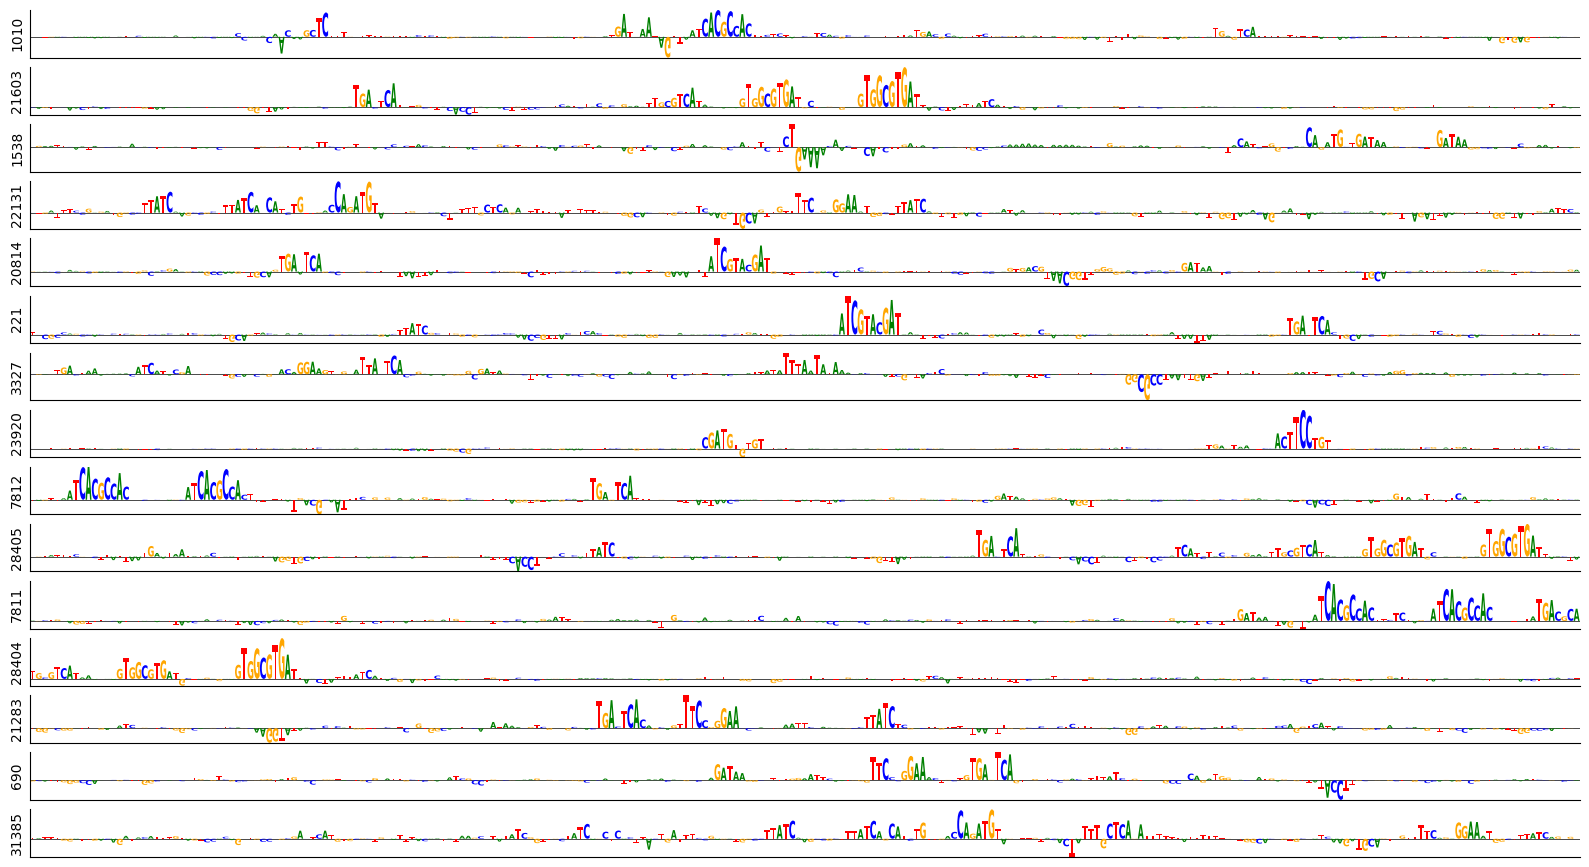

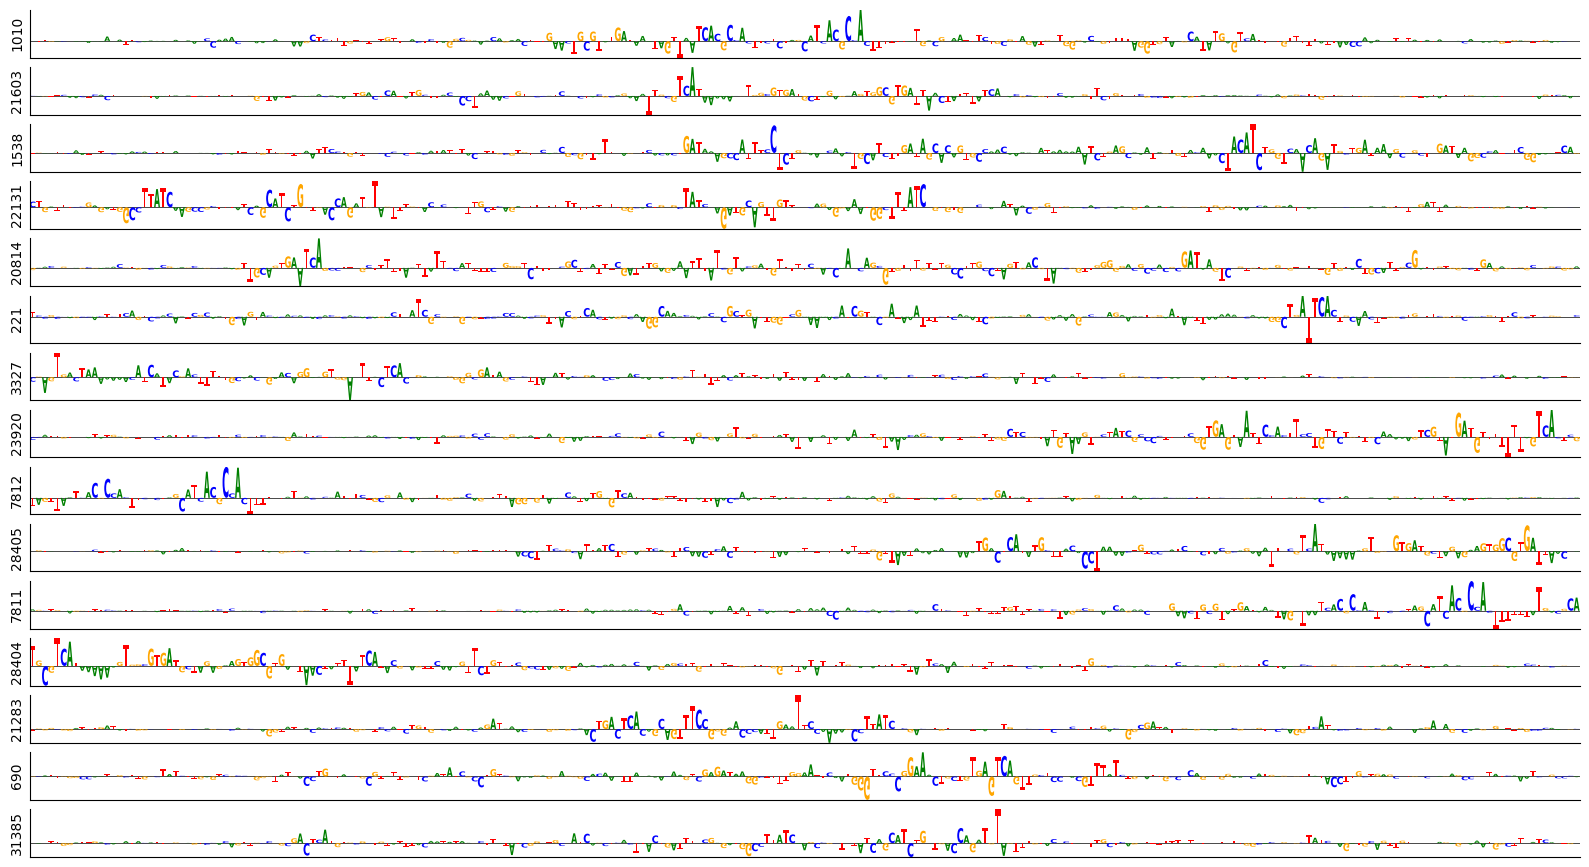

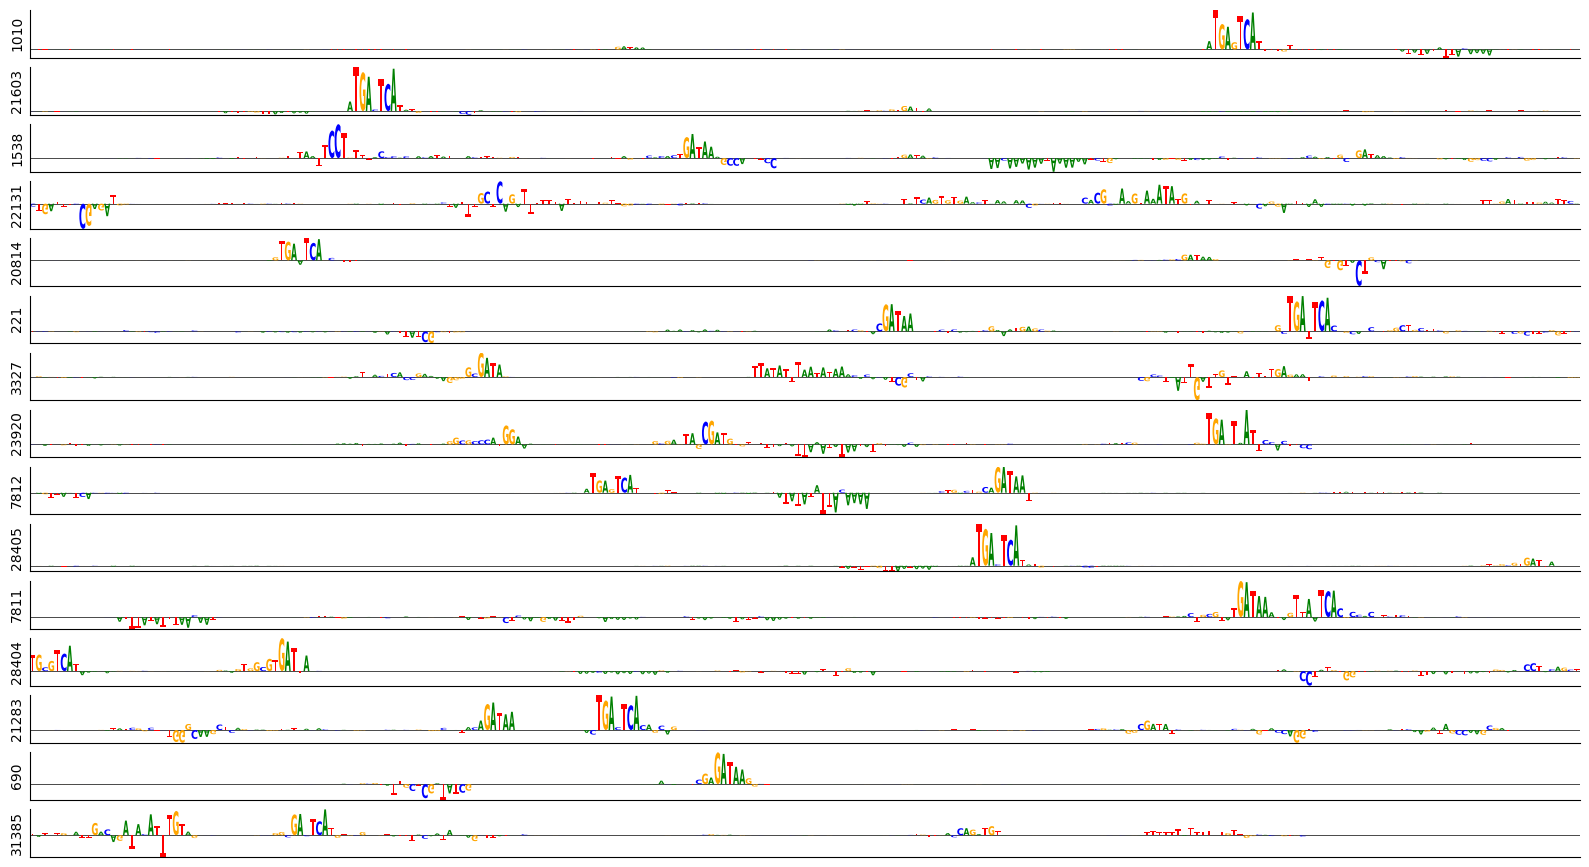

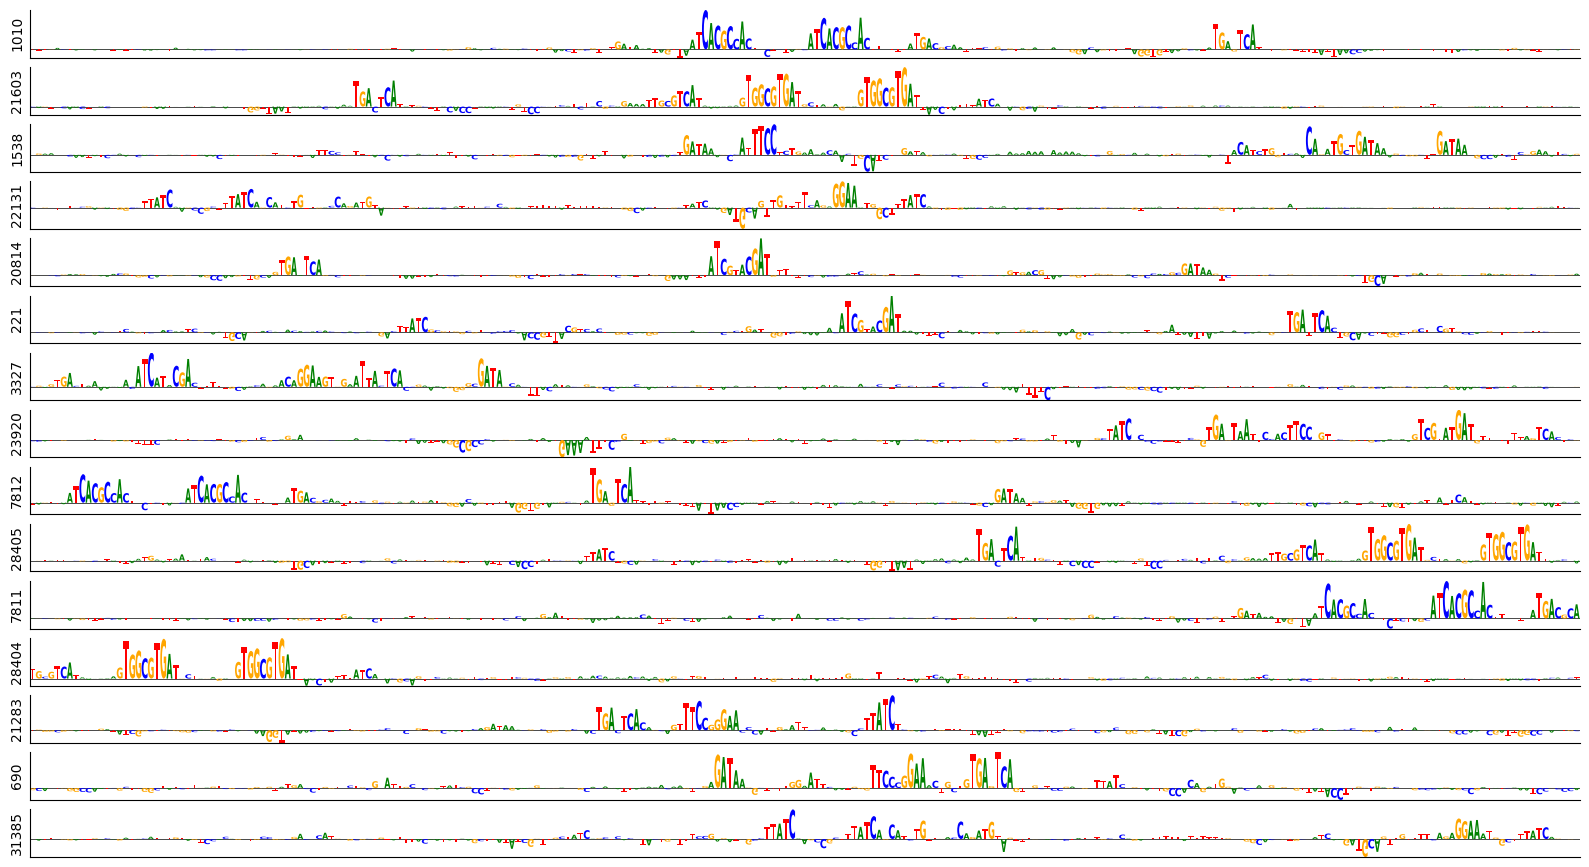

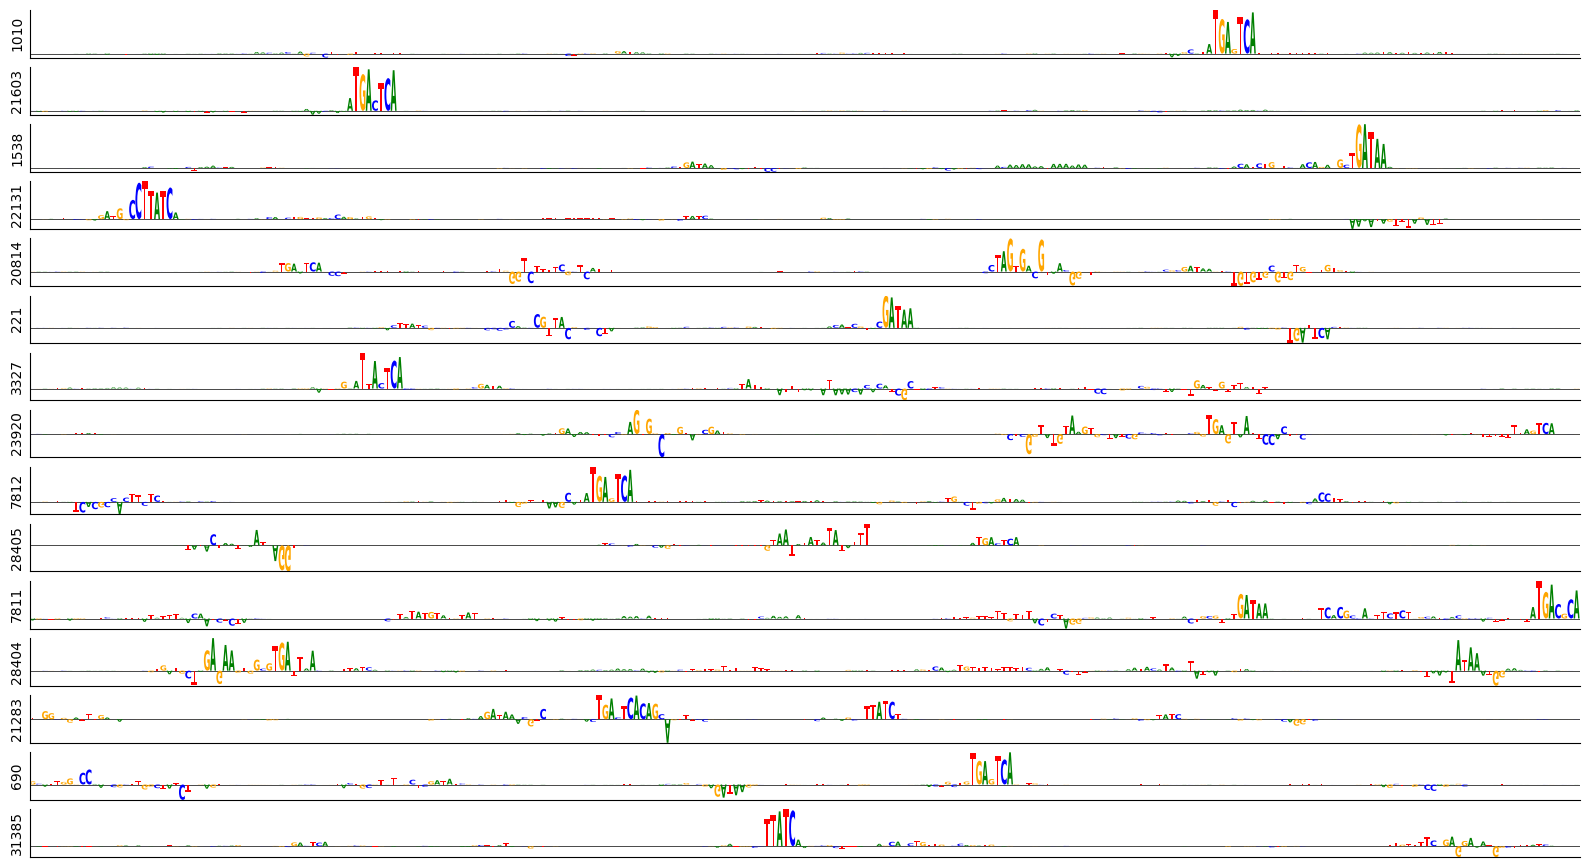

In [18]:
index = 2

for index in range(len(hits)):
    save_path = f"{working_dir}/{hits[index]}"
    config_file = f"{working_dir}/{hits[index]}/config.yaml"
    config = hominid.load_config(config_file)

    tuner = hominid.HominidTuner(
        config, 
        epochs=100, 
        tuning_mode=False, 
        save_path=save_path, 
        subsample=False
    )

    # Build the model
    model = tuner.model_builder.build_model()

    model.compile(
        tf.keras.optimizers.Adam(lr=0.001),
        loss='mse',
        metrics=[utils.Spearman, utils.pearson_r]
        )
    print(model.summary())
    model.load_weights(f'{tuner.save_path}/weights')

    # ==============================================================================
    # Plot saliency maps
    # ==============================================================================
    saliency_path = f"{save_path}/saliency"
    Path(saliency_path).mkdir(parents=True, exist_ok=True)

    print("Computing saliency maps...")
    # plot 15 sequences with highest activity for a given class
    num_plot = 15

    # sort sequences by highest activity
    sort = np.argsort(y_test[:,0])[::-1][:num_plot]
    X = x_test[sort]

    # calculate attribution maps
    saliency_scores = utils.saliency_map(X, model, class_index=0)

    saliency_scores = saliency_scores.numpy()

    # gradient correction. (Majdandzic et al. bioRxiv, 2022)
    saliency_scores -= np.mean(saliency_scores, axis=2, keepdims=True)

    fig = plt.figure(figsize=(20, 11))
    for i, index in enumerate(range(num_plot)):
        x = np.expand_dims(X[index], axis=0)
        scores = np.expand_dims(saliency_scores[index], axis=0)
        scores -= np.mean(scores, axis=2, keepdims=True)
        saliency_df = impress.grad_times_input_to_df(x, scores)

        ax = plt.subplot(num_plot,1,i+1)
        impress.plot_attribution_map(saliency_df, ax, figsize=(20,1))
        plt.ylabel(sort[i])

    fig.savefig(f'{saliency_path}/saliency.pdf', format='pdf', dpi=200, bbox_inches='tight')
    # img = mpimg.imread(f'{saliency_path}/saliency.png')
    # wandb.log({"saliency":  wandb.Image(img)})

In [8]:
import glob


glob.glob("/home/chandana/projects/hominid_pipeline/results/experiments/sweeps/*/weights.index")

176